## Visualization of the combined [World Happiness Ranking 2017](https://www.kaggle.com/unsdsn/world-happiness) and [The World Factbook Data](https://www.kaggle.com/fernandol/countries-of-the-world)  datasets

### Visualization made by Marjolein Spronk, 2018

NB: Note that the happiness score is based on the factors "GDP", "Social Support (Family)", "Life Expectation", "Freedom", "Generosity", and "Trust & Goverment Corruption" in the same dataset, which describe the extent to which these factors contribute in evaluating the happiness in each country, so we cannot use these to make a prediction about hapiness score.

Other measures we have that can be used from the other (World Factbook) dataset:
 * population
 * area
 * population density
 * coastline
 * net migration
 * literacy
 * phones
 * arable, crops
 * climate
 * birthrate
 * agriculture, industry, service


In [144]:
# Inline plots
%matplotlib inline

# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the happiness data
dfall = pd.read_csv('2017.csv')
#dfall.describe()

In [145]:
# Rename dataframe columns
dfall.columns = ['Country', 'HappinessRank', 'HappinessScore','WhiskerHigh','WhiskerLow','GDP',
              'Family','LifeExpect','Freedom','Generosity','TrustGovCorrup','DystopiaRes']
whiskers = ['WhiskerHigh','WhiskerLow' ]
df = dfall.drop(whiskers, axis=1)
df.head()

,Country,HappinessRank,HappinessScore,GDP,Family,LifeExpect,Freedom,Generosity,TrustGovCorrup,DystopiaRes
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


### World map of the Happiness ranking 2017
Scroll over the map to see country name and ranking

In [150]:
# Plot the happiness ranking on a world map
import plotly.plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

data4plot = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['HappinessRank'], 
           text = df['Country'],
          colorscale = 'Hot', reversescale = True)
mapspec = dict(title = 'World Happiness Ranking 2017', 
             geo = dict(showframe = False, projection = {'type': 'Natural Earth'}))
HappyMap = go.Figure(data = [data4plot], layout=mapspec)
iplot(HappyMap)

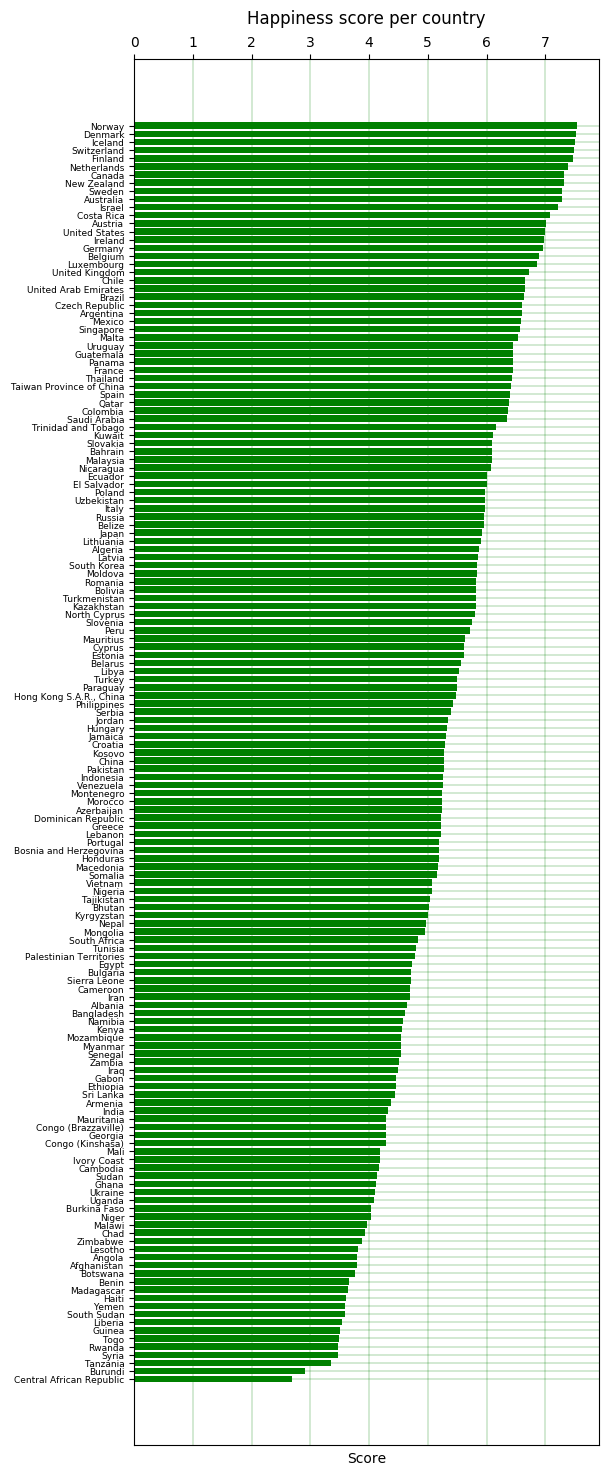

In [151]:
# Plot the ranking with barh
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(6,18))

# Example data
countries = df['Country'] 
y_pos = np.arange(len(countries))
score = df['HappinessScore']

ax.barh(y_pos, score, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Score')
ax.set_title('Happiness score per country', y=1.02)
ax.xaxis.tick_top()

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(6.5)

plt.grid(color='g', linestyle='-', linewidth=0.25)

plt.show()

## Exploring the dataset  - some visualizations

The happiness scores were calculated for each country based on measured factors (columns in the dataset). For example, for Denmark:

In [152]:
# Recalculate score for Denmark using the factors in the dataset.
denmark = df.iloc[1]
happyscore = (denmark['GDP'] + denmark['Family'] + denmark['LifeExpect'] + denmark['Freedom'] +
              denmark['Generosity'] + denmark['TrustGovCorrup'] + denmark['DystopiaRes'])
print(happyscore)   # 7.522 as can be seen in the table

7.5218347609


#### Scatter plot with the relation between GDP and Happiness
Here you can see how GDP and happiness ranking are related.
Note that GDP is the factor contributing most to the Happiness Score.

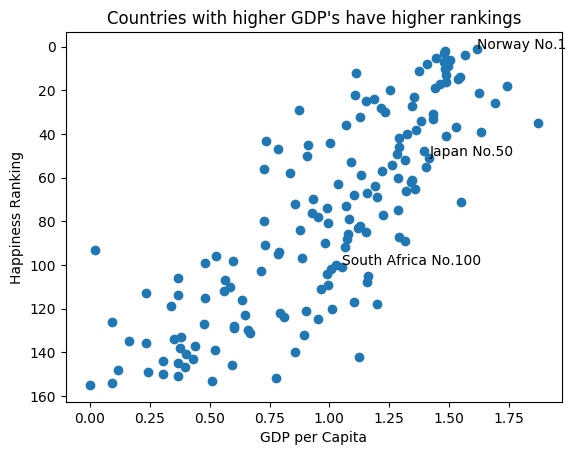

In [154]:

gdp = df['GDP']
happyrank = df['HappinessRank'] 

plt.scatter(gdp,happyrank)
plt.gca().invert_yaxis()
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Ranking')
plt.title('Countries with higher GDP\'s have higher rankings')
plt.text(1.616463, 1, 'Norway No.1')
plt.text(1.41692, 50, 'Japan No.50')
plt.text(1.0547, 100, 'South Africa No.100')

plt.show()

## Does money make happy?

What happens to the ranking when we leave out the money factor? 

GDP is the biggest contributer to the Happiness Score. There are some small shifts in ranking when GDP is left out of the Happiness Score, but nothing major happens. (Also note that the other factors could correlate with GDP, so removing GDP will not remove the influence of money on the score completely.)

In [155]:
# Create a new column with the sum of all factors except GDP
df['HappinessScore_WithoutMoney']=0
for index, row in df.iterrows():
    newscore = row['Family'] + row['LifeExpect'] + row['Freedom'] + row['Generosity'] + row['TrustGovCorrup'] + row['DystopiaRes']
    df.loc[index, "HappinessScore_WithoutMoney"] = newscore

# Determine new ranking    
df['HappyRank_WithoutMoney'] = df['HappinessScore_WithoutMoney'].rank(ascending=False)
df['HappyRank_WithoutMoney'] = df.HappyRank_WithoutMoney.astype(int)

# Compare rankings
df_rankcompare = df[['Country','HappinessRank','HappyRank_WithoutMoney', 'HappinessScore', 'HappinessScore_WithoutMoney']]
df_rankcompare = df_rankcompare.round({'HappinessScore': 2, 'HappinessScore_WithoutMoney': 2})   # round decimals
df_rankcompare.columns = ['Country','Ranking Old','Ranking New (without GDP)', 'Score Old', 'Score New (without GDP)']
df_rankcompare.head(10)   # Look at the top 10 happiest countries

,Country,Ranking Old,Ranking New (without GDP),Score Old,Score New (without GDP)
0,Norway,1,6,7.54,5.92
1,Denmark,2,1,7.52,6.04
2,Iceland,3,3,7.50,6.02
3,Switzerland,4,5,7.49,5.93
4,Finland,5,2,7.47,6.03
5,Netherlands,6,8,7.38,5.87
6,Canada,7,10,7.32,5.84
7,New Zealand,8,7,7.31,5.91
8,Sweden,9,12,7.28,5.79
9,Australia,10,11,7.28,5.80


In [156]:
# Plot ranking without the GDP data
data4plot2 = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['HappyRank_WithoutMoney'], 
           text = df['Country'],
          colorscale = 'Hot', reversescale = True)
mapspec = dict(title = 'Happiness Ranking 2017 - without GDP data', 
             geo = dict(showframe = False, projection = {'type': 'Natural Earth'}))
HappyMap = go.Figure(data = [data4plot2], layout=mapspec)
iplot(HappyMap)

## Now let's import another world dataset with additional information on countries, and look at the combined datasets

In [157]:
# Import data
df_countrydata = pd.read_csv('countries of the world.csv', decimal=",")
#df_countrydata.describe()

In [158]:
# Rename columns and look at data
df_countrydata.columns = ['Country','Region','Population','Area','PopDensity','Coastline',
                  'NetMigration','InfantMort','GDP','Literacy','Phones','Arable',
                  'Crops','Other','Climate','Birthrate','Deathrate','Agriculture',
                 'Industry','Service']
df_countrydata.head()

,Country,Region,Population,Area,PopDensity,Coastline,NetMigration,InfantMort,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [159]:
# Remove white space from strings before merging datasets
df_countrydata['Country'] = df_countrydata['Country'].str.strip()   

In [160]:
# Merge dataframes
#df_merged = pd.join(df, df_countrydata, left_on='Country', right_on='Country')
df_merged = pd.merge(df_countrydata,
                 df[['Country', 'HappinessRank', 'HappinessScore']],
                 on='Country')
df_merged.head()

,Country,Region,Population,Area,PopDensity,Coastline,NetMigration,InfantMort,GDP,Literacy,...,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,HappinessRank,HappinessScore
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,141,3.794
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,109,4.644
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,53,5.872
3,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,...,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246,140,3.795
4,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,...,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547,24,6.599


In [161]:
# There is data for 140 overlapping countries in the newly merged dataset, we lose data from 15 countries
df['Country'].isin(df_countrydata['Country']).value_counts()

True     140
False     15
Name: Country, dtype: int64

## Exploring the merged data: Is there a correlation between Population Density and Happiness Score?

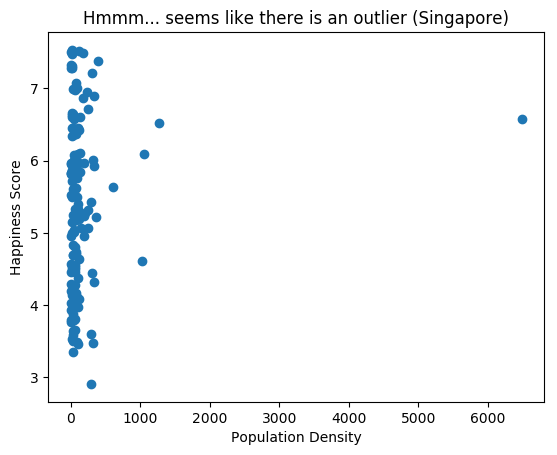

In [164]:
# Plot population density agains happiness score
popdensity = df_merged['PopDensity']
happyscore = df_merged['HappinessScore'] 
plt.scatter(popdensity,happyscore)
plt.xlabel('Population Density')
plt.ylabel('Happiness Score')
plt.title('Hmmm... seems like there is an outlier (Singapore)')
plt.show()

In [165]:
# Remove very densily populated Singapore from the data
idx_outlier=df_merged['PopDensity'] < 4000
df_merged_nooutlier = df_merged[idx_outlier]

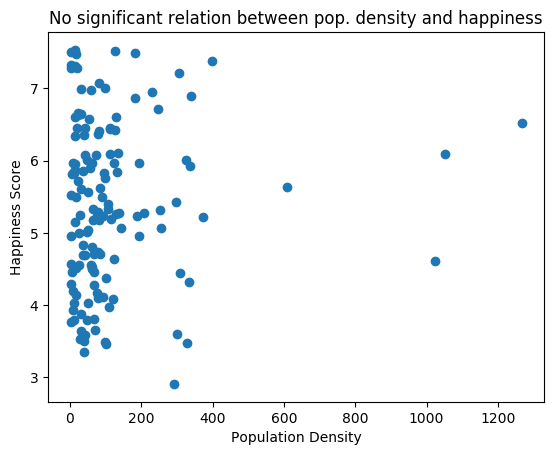

In [166]:
# Plot correlation between Population Density and Happiness Score
popdensity = df_merged_nooutlier['PopDensity']
happyscore = df_merged_nooutlier['HappinessScore'] 
plt.scatter(popdensity,happyscore)
#plt.gca().invert_yaxis()
plt.xlabel('Population Density')
plt.ylabel('Happiness Score')

plt.title('No significant relation between pop. density and happiness')
plt.show()

Let's calculate a correlation score and p-value

In [167]:
# Import scipy package
import scipy.stats  as stats

# calculate correlation
stats.pearsonr(df_merged_nooutlier['PopDensity'], df_merged_nooutlier['HappinessScore'])   # not significant!

(0.068712724418101279, 0.42154360183863837)

### We need to remove NaNs before further analyses, so drop rows with NaNs:

In [170]:
# Drop NaNs
df_merged_clean = df_merged.dropna(axis=0, how='any')
len(df_merged_clean)

121

In [171]:
# Remove white space in Region 
df_new = df_merged_clean
df_new['Region'] = df_new['Region'].str.strip() 

/Users/mspronk/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [172]:
# Unique regions
df_new["Region"].unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'OCEANIA',
       'WESTERN EUROPE', 'NEAR EAST', 'SUB-SAHARAN AFRICA', 'BALTICS',
       'NORTHERN AMERICA'], dtype=object)

In [173]:
df_new["Region"][df_new['Region'].str.contains("ASIA (EX. NEAR EAST)")] = "ASIA"
df_new["Color"]=0
df_new["Color"][df_new['Region'].str.contains("EASTERN EUROPE")] = "cadetblue"
df_new["Color"][df_new['Region'].str.contains("NORTHERN AFRICA")] = "fuchsia"
df_new["Color"][df_new['Region'].str.contains("LATIN AMER")] = "orangered"
df_new["Color"][df_new['Region'].str.contains("C.W. OF IND. STATES")] = "black"
df_new["Color"][df_new['Region'].str.contains("OCEANIA")] = "salmon"
df_new["Color"][df_new['Region'].str.contains("WESTERN EUROPE")] = "orange"
df_new["Color"][df_new['Region'].str.contains("NEAR EAST")] = "purple"
df_new["Color"][df_new['Region'].str.contains("ASIA")] = "cyan"
df_new["Color"][df_new['Region'].str.contains("SUB-SAHARAN AFRICA")] = "yellow"
df_new["Color"][df_new['Region'].str.contains("BALTICS")] = "blue"
df_new["Color"][df_new['Region'].str.contains("NORTHERN AMERICA")] = "green"

/Users/mspronk/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.

/Users/mspronk/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/mspronk/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/mspronk/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata

## What about Infant mortality and happiness? Here we find a significant correlation
However, the factors 'family' and 'life expectancy' were included in calculating the happiness score. What do these represent? Infant mortality is likely to be part of these factors as well, so the significant negative correlation found here is not very surprising...

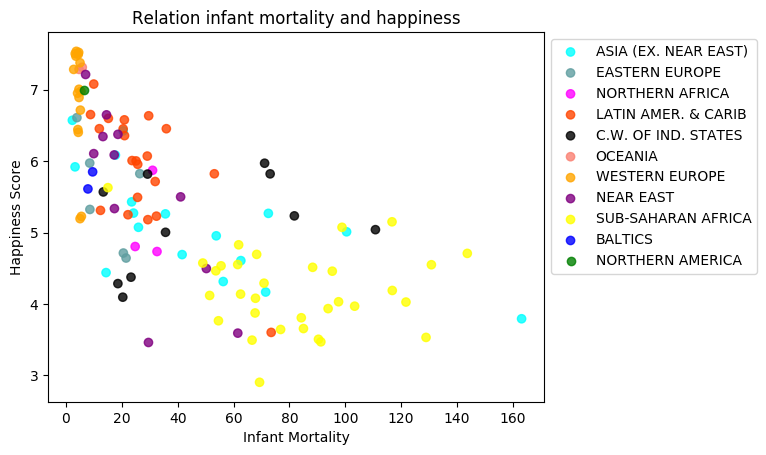

In [178]:
from matplotlib import colors as mcolors

# Plot the correlation, use different color for each region
colors = list(df_new['Color'].unique())
regions = list(df_new['Region'].unique())

for i in range(0 , len(colors)):
    data = df_new.loc[df_new['Color'] == colors[i]]
    plt.scatter('InfantMort', 'HappinessScore', data=data, color='Color', label=regions[i], alpha = 0.8)

plt.xlabel('Infant Mortality')
plt.ylabel('Happiness Score')
plt.title('Relation infant mortality and happiness')
#plt.figure(figsize=(20,10))


plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [62]:
# Calculate correlation
stats.pearsonr(df_merged_nooutlier['InfantMort'], df_merged_nooutlier['HappinessScore'])

(-0.69446228513384944, 2.5320495680132847e-21)

## Is climate related to happiness? 

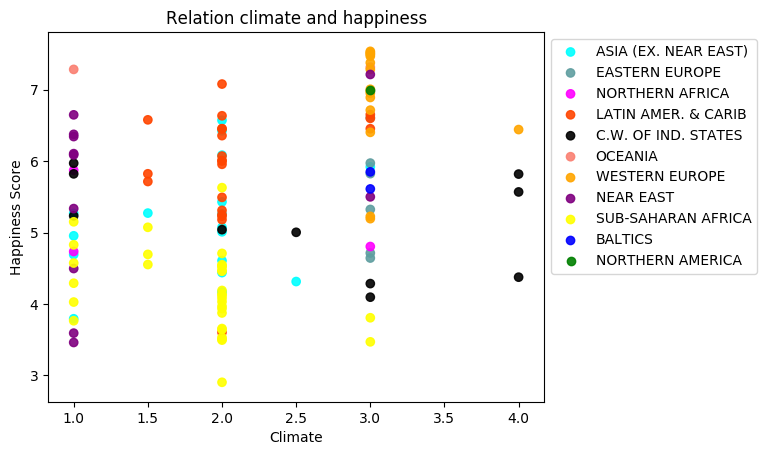

In [174]:
# Define colors and regions
colors = list(df_new['Color'].unique())
regions = list(df_new['Region'].unique())

# Plot scores per climate
for i in range(0 , len(colors)):
    data = df_new.loc[df_new['Color'] == colors[i]]
    plt.scatter('Climate', 'HappinessScore', data=data, color='Color', label=regions[i], alpha = 0.9)

plt.xlabel('Climate')
plt.ylabel('Happiness Score')
plt.title('Relation climate and happiness')

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

The result is significant (see spearman rank correlation below) but what does that mean? It seems that especially people in the third climate group are happy.

In [63]:
# Calculate rank correlation
stats.spearmanr(df_new['Climate'], df_new['HappinessScore']) 

SpearmanrResult(correlation=0.29919206146628508, pvalue=0.00085712845486889914)

## Phones and GDP are positively correlated

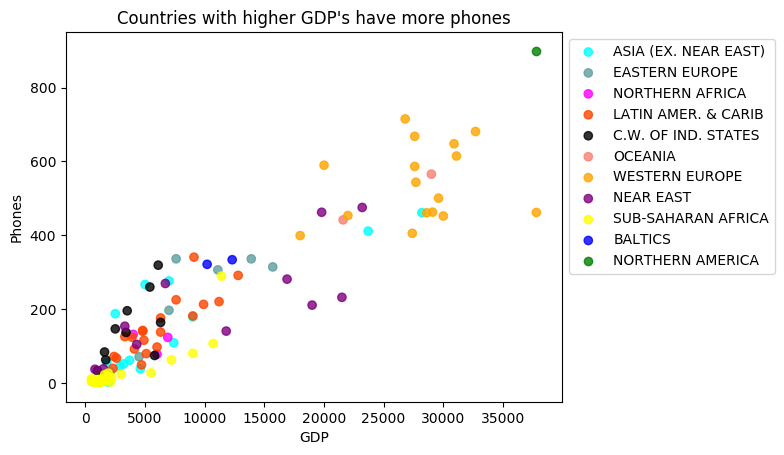

In [175]:
# Define colors and regions
colors = list(df_new['Color'].unique())
regions = list(df_new['Region'].unique())

# Plot phones and GDP
for i in range(0 , len(colors)):
    data = df_new.loc[df_new['Color'] == colors[i]]
    plt.scatter('GDP', 'Phones', data=data, color='Color', label=regions[i], alpha = 0.8)

plt.xlabel('GDP')
plt.ylabel('Phones')
plt.title('Countries with higher GDP\'s have more phones')
#plt.figure(figsize=(20,10))


plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [176]:
# Pearson correlation:
stats.pearsonr(df_new['Climate'], df_new['HappinessScore']) 

(0.30323891495985988, 0.00072228529965001783)

In [177]:
# Plot phones variable
data4plot3 = dict(type = 'choropleth', 
           locations = df_new['Country'],
           locationmode = 'country names',
           z = df_new['Phones'], 
           text = df_new['Country'],
          colorscale = 'Blues', reversescale = True)
mapspec = dict(title = 'Phones per country (units unknown...)', 
             geo = dict(showframe = False, projection = {'type': 'Natural Earth'}))
PhoneMap = go.Figure(data = [data4plot3], layout=mapspec)
iplot(PhoneMap)

This was an overview of the World Happiness Ranking 2017 and the world Factbook Data. 

Short summary: 
Northern European countries have been reported to be the happiest. GDP was an important factor in determining happiness. High population density was not related to happiness, but low infant mortality was. 

People in certain climates appear to be happier than others, and more phones were found in regions with higher GDPs (and higher happiness). 

Remember that correlation does not imply causation.  

Thank you for reading!
